In [7]:
import pandas as pd 
import numpy as np
import seaborn as sns
import re 
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [9]:
#Extracting the names of the columns from the dataset description with regex
file =open("spambase.names","r")
txt = file.read()
names = re.findall("\n(\S*):", txt)

#Adding the last column which is the target (spam or not)
names.append("spam")
names

['word_freq_make',
 'word_freq_address',
 'word_freq_all',
 'word_freq_3d',
 'word_freq_our',
 'word_freq_over',
 'word_freq_remove',
 'word_freq_internet',
 'word_freq_order',
 'word_freq_mail',
 'word_freq_receive',
 'word_freq_will',
 'word_freq_people',
 'word_freq_report',
 'word_freq_addresses',
 'word_freq_free',
 'word_freq_business',
 'word_freq_email',
 'word_freq_you',
 'word_freq_credit',
 'word_freq_your',
 'word_freq_font',
 'word_freq_000',
 'word_freq_money',
 'word_freq_hp',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_650',
 'word_freq_lab',
 'word_freq_labs',
 'word_freq_telnet',
 'word_freq_857',
 'word_freq_data',
 'word_freq_415',
 'word_freq_85',
 'word_freq_technology',
 'word_freq_1999',
 'word_freq_parts',
 'word_freq_pm',
 'word_freq_direct',
 'word_freq_cs',
 'word_freq_meeting',
 'word_freq_original',
 'word_freq_project',
 'word_freq_re',
 'word_freq_edu',
 'word_freq_table',
 'word_freq_conference',
 'char_freq_;',
 'char_freq_(',
 'char_freq_[',
 '

In [4]:
freq_words = re.findall("freq_(\S*):", txt)
print(freq_words)

['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet', 'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses', 'free', 'business', 'email', 'you', 'credit', 'your', 'font', '000', 'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 'telnet', '857', 'data', '415', '85', 'technology', '1999', 'parts', 'pm', 'direct', 'cs', 'meeting', 'original', 'project', 're', 'edu', 'table', 'conference', ';', '(', '[', '!', '$', '#']


In [2]:
email = (f"""It's that time of year again! Time for our huge annual Black Friday 5% off SITEWIDE sale! Our standard discounted prices plus an extra 5% off! Use coupon code EPICFIVE. Hurry, inventory is limited!
Shop Black Friday Savings! 🦃
This time of year everyone is scrambling to find the perfect gifts for their loved ones. If you're tired of feeling like you're a Christmas Grinch when it comes to gift giving, well this gift guide is sure to get you into the holiday spirit!
CardCash 2022 Gift Guide
🎄Happy Shopping!""")

In [3]:
def MailTransf(email):
    freq_words = ['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet', 'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses', 'free', 'business', 'email', 'you', 'credit', 'your', 'font', '000', 'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 'telnet', '857', 'data', '415', '85', 'technology', '1999', 'parts', 'pm', 'direct', 'cs', 'meeting', 'original', 'project', 're', 'edu', 'table', 'conference']
    freq_caract = [';', '(', '[', '!', '$', '#']
    freq_w_list = [ 100*email.split(" ").count(x)/len(email.split(" ")) for x in freq_words]
    freq_c_list = [ 100*email.count(x)/len(email) for x in freq_caract]
    lengt_Capital = [len(x) for x in re.findall("[A-Z]+", email)]
    
    freq_w_list.extend(freq_c_list)
    freq_w_list.extend([np.mean(lengt_Capital), np.max(lengt_Capital), np.sum(lengt_Capital)])

    return [freq_w_list]

l = MailTransf(email)
len(*l)

NameError: name 're' is not defined

In [10]:
Data= pd.read_csv("spambase.data", sep=",", names = names)
df = pd.DataFrame(Data)
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.000,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.000,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.000,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.000,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.000,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.000,0.054,0.000,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.000,0.206,0.000,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.000,0.271,0.000,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.040,0.030,0.000,0.244,0.081,0.000,1.729,43,749,1


In [10]:
# According to the spambase.DOCUMENTATION we should have 4601 instances
print(f"Number of instances = 4601 :",df.shape[0] == 4601)

#Where 1813 of them are spam
print(f"Number of spam instances = 1813 :",df[df.spam == 1].shape[0] == 1813)

#Number of Attributes: 58
print(f"Number of Attributes: 58 :",df.shape[1] == 58)

Number of instances = 4601 : True
Number of spam instances = 1813 : True
Number of Attributes: 58 : True


# Data PreProcessing

In [6]:
df.shape

NameError: name 'df' is not defined

In [ ]:
df.mean()

In [ ]:
df.describe()

In [16]:
df.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

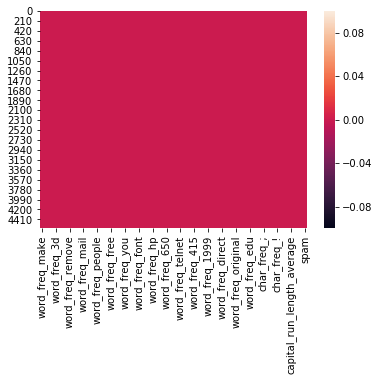

In [15]:
sns.heatmap(df.isnull())

In [19]:
#Columns representing the frequency of the word "you" in an e-mail
df.word_freq_you

0       1.93
1       3.47
2       1.36
3       3.18
4       3.18
5       0.00
6       3.85
7       0.00
8       1.23
9       1.67
10      3.84
11      1.16
12      2.09
13      2.72
14      3.21
15      1.70
16      1.88
17      0.00
18      3.15
19      2.22
20      0.00
21      2.09
22      0.00
23      1.16
24      0.00
25      2.09
26      0.00
27      3.33
28      0.00
29      1.30
        ... 
4571    1.63
4572    0.00
4573    2.06
4574    3.86
4575    0.00
4576    1.49
4577    3.61
4578    0.80
4579    0.97
4580    0.00
4581    3.06
4582    0.89
4583    1.85
4584    1.83
4585    9.52
4586    1.47
4587    0.71
4588    0.00
4589    0.54
4590    2.90
4591    6.89
4592    0.62
4593    0.00
4594    6.45
4595    3.57
4596    0.62
4597    6.00
4598    1.50
4599    1.93
4600    4.60
Name: word_freq_you, Length: 4601, dtype: float64

In [19]:
#If Spam=1 the e-mail is considered as a spam.
df_spam = df[df.spam == 1]
df_non_spam = df[df.spam == 0]
df_spam

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.00,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.00,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.000,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.00,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.000,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.00,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.000,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.00,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.000,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.00,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.000,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.00,1.92,0.00,0.00,0.00,0.00,0.64,...,0.000,0.054,0.000,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.00,1.88,0.00,0.00,1.88,0.00,0.00,...,0.000,0.206,0.000,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.00,0.61,0.00,0.30,0.00,0.92,0.76,...,0.000,0.271,0.000,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.00,0.19,0.32,0.38,0.00,0.06,0.00,...,0.040,0.030,0.000,0.244,0.081,0.000,1.729,43,749,1


In [20]:
#Every columns in df_freq represent the frequency a word is appearing in an e-mail
non_freq_col = df.columns[-4:]
df_freq = df.drop(non_freq_col,axis=1)
non_freq_col

Index(['capital_run_length_average', 'capital_run_length_longest',
       'capital_run_length_total', 'spam'],
      dtype='object')

word_freq_you    1.6621
dtype: float64


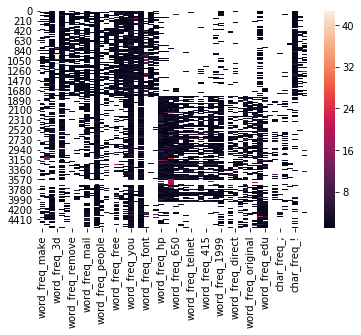

In [15]:
#We can see that there are a lot of frequencies that are superior to 1 which is impossible
#But the data still seems coherent
#ex: the most frequent word is "you" with a frequencie of 1.66 
#So we wont touch this part and work with it 
print(df_freq.mean()[df_freq.mean() > 1])
sns.heatmap(df_freq[df_freq > 1])

## Data Visualisation

In [46]:
sns.set_theme(style="whitegrid")

AttributeError: module 'seaborn' has no attribute 'set_theme'

In [17]:
df_freq.mean()[df_freq.mean() > 1]

word_freq_you    1.6621
dtype: float64

In [13]:
corr_mat = df.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .5),
)
# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

AttributeError: module 'seaborn' has no attribute 'relplot'

In [6]:
df.spam.value_counts().index

Int64Index([0, 1], dtype='int64')

In [7]:
pie=px.pie(df.spam.value_counts(),
           values=df.spam.value_counts(),
           names=["nonSpam","Spam"],
           title='Proportion of spams')
pie.update_traces(textposition='inside', textinfo='percent+label')

NameError: name 'px' is not defined

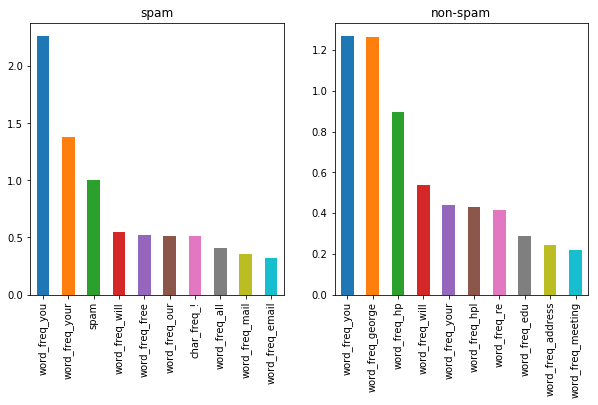

In [53]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
df_spam.mean().sort_values(ascending=False)[3:][:10].plot.bar(ax=ax[0], title='spam')
df_non_spam.mean().sort_values(ascending=False)[3:][:10].plot.bar(ax=ax[1], title='non-spam')

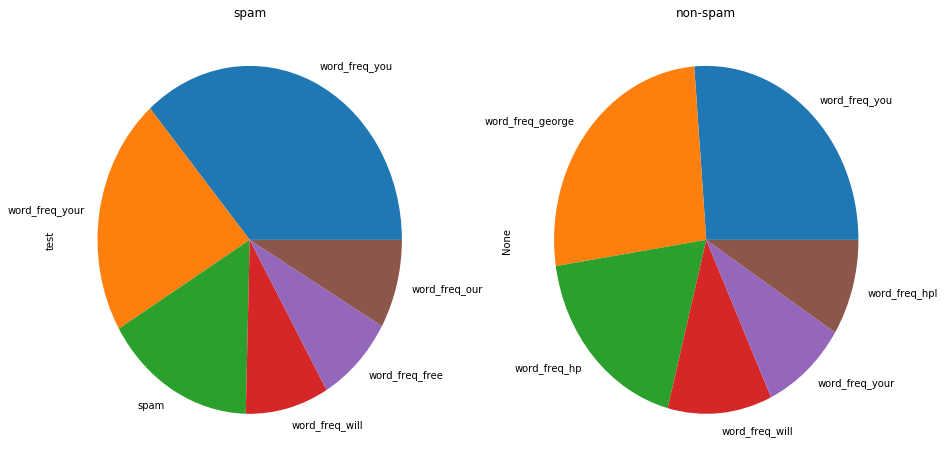

In [22]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(15,8))
ax1=df_spam.mean().sort_values(ascending=False)[3:][:6].plot.pie(ax=ax[0],title='spam')
ax1.set_ylabel("test")
ax2=df_non_spam.mean().sort_values(ascending=False)[3:][:6].plot.pie(ax=ax[1],title='non-spam')
ax2=

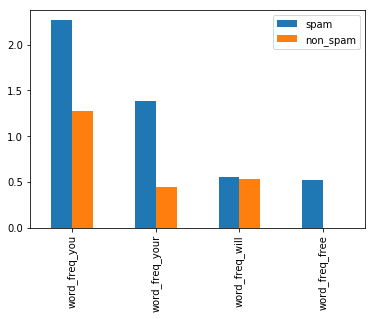

In [34]:
df_visu_freq = pd.DataFrame()
df_visu_freq["spam"] = df_spam.mean().sort_values(ascending=False)[3:][:5]
df_visu_freq["non_spam"] = df_non_spam.mean().sort_values(ascending=False)[3:][:5]
df_visu_freq = df_visu_freq.drop("spam",axis=0)

df_visu_freq.plot.bar()

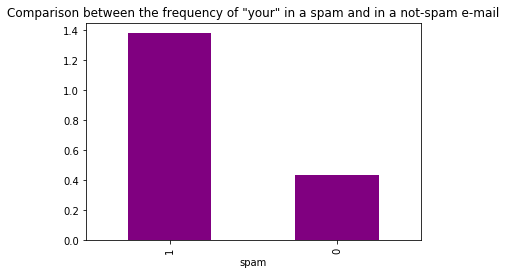

In [73]:
df.groupby('spam')['word_freq_your'].mean().sort_values(ascending=False).plot.bar(color = 'purple',title='Comparison between the frequency of "your" in a spam and in a not-spam e-mail')

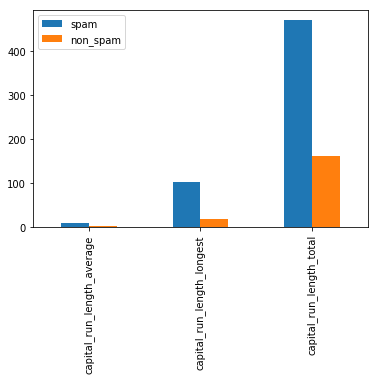

In [26]:
df_visu_cap = pd.DataFrame()
df_visu_cap["spam"] = df_spam[non_freq_col][:-2].mean()
df_visu_cap["non_spam"] = df_non_spam[non_freq_col][:-2].mean()
df_visu_cap = df_visu_cap.drop("spam",axis=0)

df_visu_cap.plot.bar()

In [ ]:
!conda install seaborn==0.11.2

### Modeling

In [ ]:
from sklearn.model_selection import train_test_split

X = np.array(df.drop("spam",axis=1))
y = np.array(df["spam"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=123)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Logistic Regression with SGD training

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import time

clf = SGDClassifier(loss="log", penalty="l2")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
x_pred = clf.predict(X_train)
print('Train Accuracy: {:.2f}'.format(accuracy_score(y_train, x_pred)))
print('Test Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))


In [ ]:
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    clf = SGDClassifier(loss="log", penalty="l2", max_iter=n_iter)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
  
plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores) 

### Linear SVM with SGD training

In [ ]:
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
x_pred = clf.predict(X_train)
print('Train Accuracy: {:.2f}'.format(accuracy_score(y_train, x_pred)))
print('Test Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

In [ ]:
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=n_iter)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
  
plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores)

In [ ]:
losses = ["hinge", "log", "modified_huber", "perceptron", "squared_hinge"]
scores = []
for loss in losses:
    clf = SGDClassifier(loss=loss, penalty="l2", max_iter=1000)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
  
plt.title("Effect of loss")
plt.xlabel("loss")
plt.ylabel("score")
x = np.arange(len(losses))
plt.xticks(x, losses)
plt.plot(x, scores) 

##### Hinge, which stands for the use of a linear SVM, gives the best score and the use of the perceptron gives the worst value.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber", "perceptron"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "elasticnet", "none"],
}

clf = SGDClassifier(max_iter=1000)
grid = GridSearchCV(clf, param_grid=params, cv=10)


grid.fit(X_train, y_train)

print(grid.best_params_) 

In [ ]:
grid_predictions = grid.predict(X_test) 

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))

In [ ]:
X_test

In [ ]:
type(l)

In [ ]:
email2 ="""Hello, 
Can we have a meeting tomorow we need to talk about an important thing
cheers,
Patrick"""

In [ ]:
grid.predict(l)

In [ ]:
grid.predict(MailTransf(email2))